<a href="https://colab.research.google.com/github/Kojithecat/Python/blob/master/primera_redneuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

(500, 1)


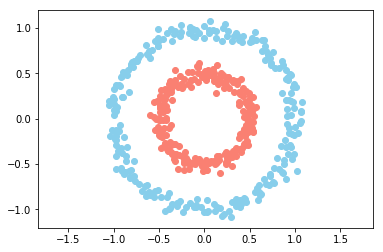

In [77]:
# Crear el dataset

n = 500
p = 2
x,y =make_circles(n_samples = n, factor = 0.5, noise = 0.05)

y = y[:, np.newaxis]
print(y.shape)


plt.scatter(x[y[:,0] == 0 , 0], x[y[:,0] == 0, 1], c="skyblue")
plt.scatter(x[y[:,0] == 1 , 0], x[y[:,0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [0]:
# Classe de la capa de la red

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    
    self.b = np.random.rand(1,n_neur)       * 2 - 1
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1

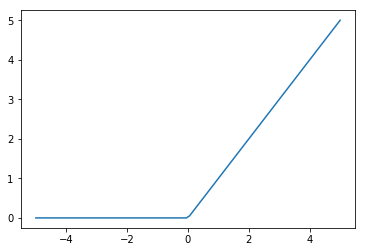

In [43]:
# Funciones de activación

sigm = ((lambda x: 1/(1+np.e ** (-x))),
        lambda x: x *(x*(1-x)))

relu = lambda x: np.maximum(0, x)


_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))

In [95]:




def create_nn(topology, act_f):
  
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
 
  return nn



topology = [p, 4, 8, 1]

create_nn(topology, sigm)

In [96]:

neural_net = create_nn(topology, sigm)

l2_cost = (lambda yp, yr: np.mean((yp - yr) ** 2),
           lambda yp, yr: (yp - yr))

def train(neural_net, x, y, l2_cost, lr = 0.5, train =True):
  # Forward pass
  
  out = [(None, x)]
  
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)  
  
    out.append((z,a))
  
  if train:
    # Backward pass
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
      
      z = out[l+1][0] 
      a = out[l+1][1]
      
       
      if l == len(neural_net) - 1:
        # Calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a, y) * neural_net[l].act_f[1](a))
      else:
        # Calcular delta respecto a capa previa        
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))
        
      _w = neural_net[l].w
     
      # Gradient Descent  
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0,keepdims =True)* lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
    
  return out[-1][1]
    
train(neural_net, x , y, l2_cost, 0.5)

print("")


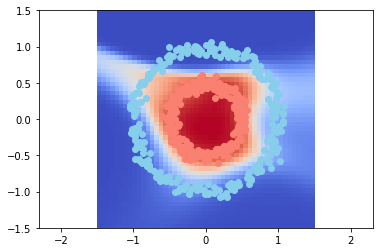

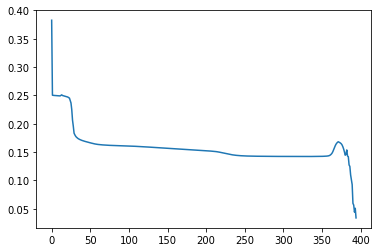

In [0]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(10000):
  
    # Entrenamos la red
    py = train(neural_n, x, y, l2_cost, lr=0.05)
    
    if i % 25 == 0:
      
      loss.append(l2_cost[0](py, y))
      
      res = 50
      
      _x0 = np.linspace(-1.5, 1.5, res)
      _x1 = np.linspace(-1.5, 1.5, res)
      
      _y = np.zeros((res, res))
      
      for i0, x0 in enumerate(_x0):
        for i1, x1 in enumerate(_x1):
          _y[i0, i1] = train(neural_n, np.array([[x0, x1]]), y, l2_cost, train = False)[0][0]
      
      plt.pcolormesh(_x0, _x1, _y, cmap = "coolwarm")
      plt.axis("equal")
      
      plt.scatter(x[y[:,0] == 0, 0], x[y[:,0] == 0, 1], c = "skyblue")
      plt.scatter(x[y[:,0] == 1, 0], x[y[:,0] == 1, 1], c = "salmon")
      
      clear_output(wait = True)
      plt.show()
      plt.plot(range(len(loss)), loss)
      plt.show()
      time.sleep(0.1)
      
